# Случайные процессы. Прикладной поток.
## Практическое задание 3

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[СП17] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* При проверке некоторый код из вашего решения будет **проверяться автоматически**. Этот код вы должны скопировать в файл с названием `c3.N.py` и прислать вместе с решением. Что именно должно быть в этом файле, написано далее. Код должен корректно работать в Python 3.5 под Убунту.

--------------

Для выполнения задания потребуются следующие библиотеки: bs4, urllib, networkx. Следующими командами можно их поставить (Ubuntu):

sudo pip3 install beautifulsoup4

sudo pip3 install urllib2

sudo pip3 install networkx

--------------

## PageRank

#### История

(Взято с <a href='https://ru.wikipedia.org/wiki/PageRank'>Википедии</a>)

В 1996 году Сергей Брин и Ларри Пейдж, тогда ещё аспиранты Стэнфордского университета, начали работу над исследовательским проектом BackRub — поисковой системой по Интернету, использующей новую тогда идею о том, что веб-страница должна считаться тем «важнее», чем больше на неё ссылается других страниц, и чем более «важными», в свою очередь, являются эти страницы. Через некоторое время BackRub была переименована в Google. Первая статья с описанием применяющегося в ней метода ранжирования, названного PageRank, появилась в начале 1998 года, за ней следом вышла и статья с описанием архитектуры самой поисковой системы.

Их система значительно превосходила все существовавшие тогда поисковые системы, и Брин с Пейджем, осознав её потенциал, основали в сентябре 1998 года компанию Google Inc., для дальнейшего её развития как коммерческого продукта.

#### Описание

Введем понятие веб-графа. Ориентированный граф $G = (V, E)$ называется веб-графом, если 
* $V = \{url_i\}_{i=1}^n$ --- некоторое подмножество страниц в интернете, каждой из которых соответствует адрес $url_i$.
* Множество $E$ состоит из тех и только тех пар $(url_i, url_j)$, для которых на странице с адресом $url_i$ есть 
ссылка на $url_j$.

Рассмотрим следующую модель поведения пользователя. В начальный момент времени он выбирает некоторую страницу из $V$ в соответствии с некоторым распределением $\Pi^{(0)}$. Затем, находясь на некоторой странице, он может либо перейти по какой-то ссылке, которая размещена на этой странице, либо выбрать случайную страницу из $V$ и перейти на нее (damping factor). Считается, что если пользователь выбирает переход по ссылке, то он выбирает равновероятно любую ссылку с данной страницы и переходит по ней. Если же он выбирает переход не по ссылке, то он также выбирает равновероятно любую страницу из $V$ и переходит на ее (в частности может остаться на той же странице). Будем считать, что переход не по ссылке пользователь выбирает с некоторой вероятностью $p \in (0, 1)$. Соответственно, переход по ссылке он выбирает с вероятностью $1 - p$. Если же со страницы нет ни одной ссылки, то будем считать, что пользователь всегда выбирает переход не по ссылке.

Описанная выше модель поведения пользователя называется моделью PageRank. Нетрудно понять, что этой модели соответствует некоторая марковская цепь. Опишите ее.
* Множество состояний: **$\mathcal{X} = V$, например, номера вершин.**
* Начальное распределение: **Некоторая строка $\Pi^{(0)}$, для которой верно следующее: $\sum\limits_{j \in \mathcal{X}} \pi_{j} = 1$ и $\forall j \in \mathcal{X} \ 0 \leq \pi_{j} \leq 1$. На семинаре было сказано, что неплохо рассматривать равномерное распределение.**
* Переходные вероятности: **определим $N_{i} = \left\|\{(u_{i}, u_{j}) : (u_{i}, u_{j}) \in E\right\|$, где оператор $\left\| \cdot \right\|$ обозначачет количество элементов в множестве. Тогда можно определить переходные вероятности следующим образом:**
    1. Если $N_{i} > 0$, то $p_{ij} = \cfrac{p}{\left\|V\right\|} + \cfrac{1-p}{N_{i}}I_{(u_{i}, u_{j}) \in E}$
    2. Если $N_{i} = 0$, то $p_{ij} = \cfrac{1}{\left\|V\right\|}$

#### Вычисление

Данная марковская цепь является эргодической. Почему?

**Несложно заметить, что:**

1. Данная марковская цепь является однородной (видно из матрицы переходных вероятностей)
2. $\exists n_0 = 1 : P^{(n_{0})} > 0$

** Это значит, что применима эргодическая теорема, из которой, в частности, следует, что данная цепь эргодическая.**

А это означает, что цепь имеет некоторое эргодическое распределение $\Pi$, которое является предельным и единственным стационарным. Данное распределение называется весом PageRank для нашего подмножества интернета.

Как вычислить это распределение $\Pi$ для данного веб-графа? Обычно для этого используют степенной метод (power iteration), суть которого состоит в следующем. Выбирается некоторое начальное распределение $\Pi^{(0)}$. Далее производится несколько итераций по формуле $\Pi^{(k)} = \Pi^{(k - 1)} P$, где $P$ --- матрица переходных вероятностей цепи, до тех пор, пока $\left|\left|\Pi^{(k)} - \Pi^{(k - 1)}\right|\right| > \varepsilon$. Распределение $\Pi^{(k)}$ считается приближением распредения $\Pi$.

Имеет ли смысл выполнять подобные итерации для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории?

**Если $\Pi$ - предельное, то, по определению, $\forall \Pi^{(0)} \ \Pi^{(n)} = \Pi^{(0)}P^{n} \rightarrow \Pi$. Таким образом, к этому $\Pi$ будут сходится при любом $\Pi^{(0)}$. Итак, с точки зрения теории достаточно смотреть только на какое-то одно $\Pi^{(0)}$.**

А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

**В данном случае это имеет некоторый смысл: мы сможем посмотреть поведение пользователя, когда он начинает с заданного распределения (например, если взять $(1, 0,\ldots, 0)$ - то если он начинает с первой странциы). Эта информация, возможно, поможет нам в каком-то случае.**

Какая верхняя оценка на скорость сходимости?

**$\left\|p_{ij}^{(n)} - \pi_{j}\right\| \leq O(1 - \epsilon^{\frac{n}{n_{0}}})$, где $\epsilon = \min\limits_{i,j}P^{(n_{0})}$.**

## Часть 1


In [1]:
import numpy as np
from scipy.stats import bernoulli
import networkx
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse
from time import sleep
from itertools import product
import matplotlib.pyplot as plt

%matplotlib inline

Реализуйте вычисление весов PageRank power-методом.

Реализовать может быть удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

In [221]:
def create_page_rank_markov_chain(links, damping_factor=0.15, N=None):
    """ По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        N --- число веб-страниц;
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    """

    links = np.array(links)
    if N is None:
        N = links.max() + 1
        
    prob_matrix = np.zeros((N, N), dtype=float)
    
    # Матрица смежности.
    adj_matrix = np.zeros((N, N), dtype=int)
    adj_matrix[links[:,0], links[:,1]] = 1
    
    with np.errstate(divide='ignore', invalid='ignore'):
        # Посчитали N_{i}
        score = np.sum(adj_matrix, axis=1)
        
        # Добавили телепортацию
        prob_matrix += np.ones(N) * damping_factor / N
        
        # Добавили прямые переходы
        prob_matrix += adj_matrix * (1 - damping_factor) / score.reshape((N,1))
        
        # Учли изолированные вершины
        prob_matrix[score == 0] = np.ones(N) / N
    
    prob_matrix = np.nan_to_num(prob_matrix)
    prob_matrix = np.matrix(prob_matrix)
    
    return prob_matrix


def page_rank(links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False, N=None):
    """ Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) на |V|.
    """
    
    prob_matrix = create_page_rank_markov_chain(links, 
                                                damping_factor=damping_factor,
                                                N=N)
    distribution = np.matrix(start_distribution)
    
    trace = []
    
    while np.linalg.norm(distribution * prob_matrix - distribution, ord=2) >\
    tolerance:
        trace.append(distribution)
        distribution = distribution * prob_matrix
    
    if return_trace:
        return np.array(distribution).ravel(), np.array(trace)
    else:
        return np.array(distribution).ravel()

**Автоматическая проверка**

Реализацию функций create_page_rank_markov_chain и page_rank скопируйте в файл с названием `c3.N.py` и вышлите на почту. Будет проверяться только корректность выдаваемых значений. Проверки на время работы не будет.

----------

Давайте посмотрим, как оно работает.
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [222]:
def random_graph(n, p):
    links = []
    
    for i in range(n):
        for j in range(n):
            if bernoulli.rvs(p) == 1:
                links.append((i, j))
    return links

Теперь сгенерируем случайный граф и нарисуем его.

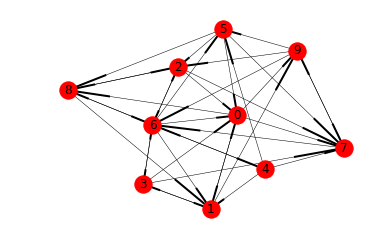

In [223]:
N, p = 10, 0.5
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
G.add_nodes_from(np.arange(N)) # добавление вершин
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

**Вершины добавляются, потому что какие-то из них могли быть изолированы. Если не добавлять их, то они не будут отрисованы.**

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

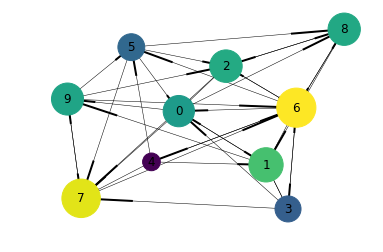

In [224]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution, N=N)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

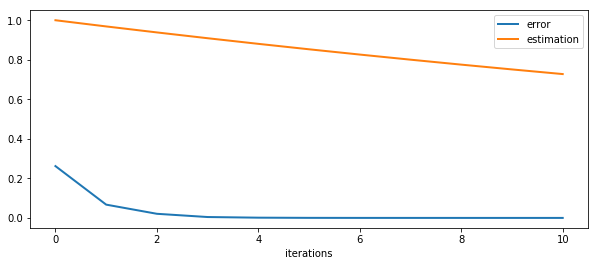

In [225]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True, N=N)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - np.min(pr_distribution)) ** x, 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

**Вывод:** В реальности стремление к предельному распределению происходит быстрее.

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

**Зависимость от n**

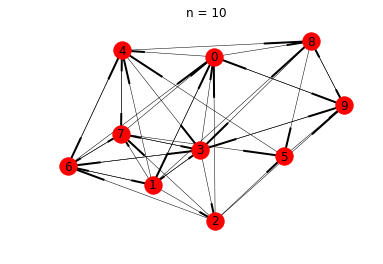

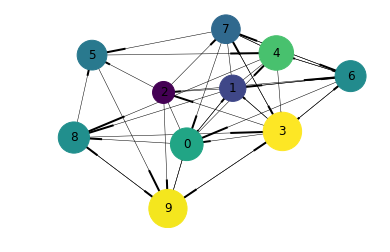

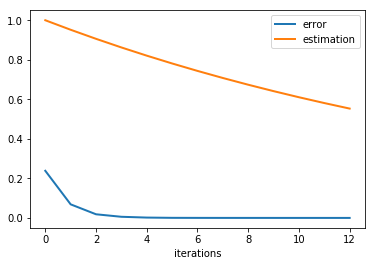

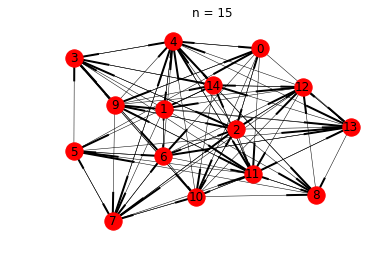

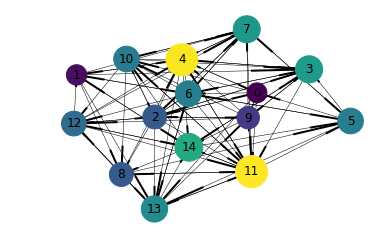

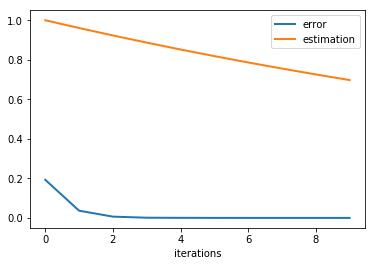

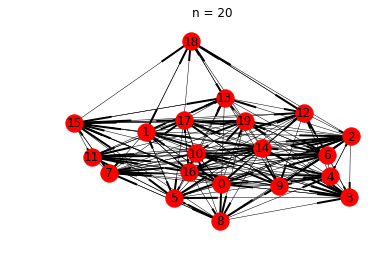

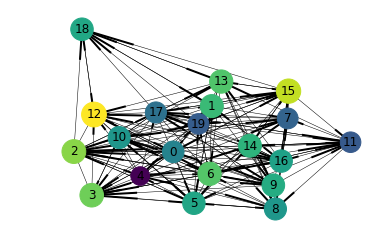

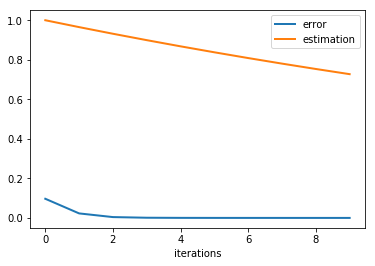

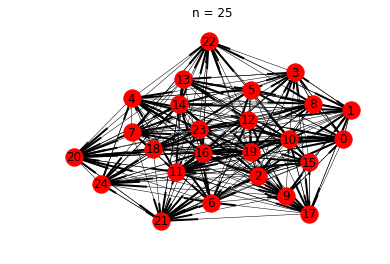

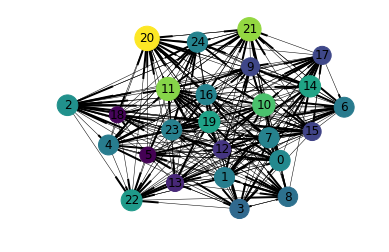

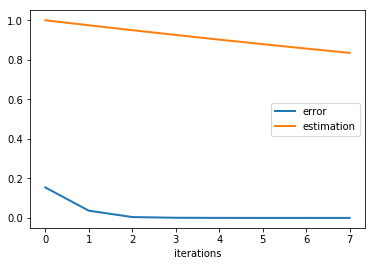

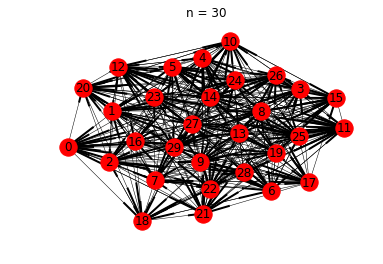

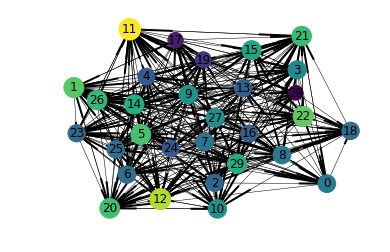

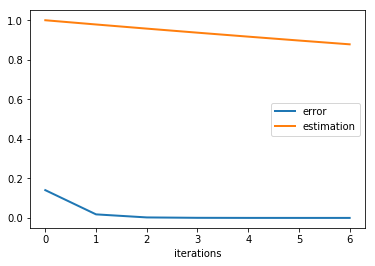

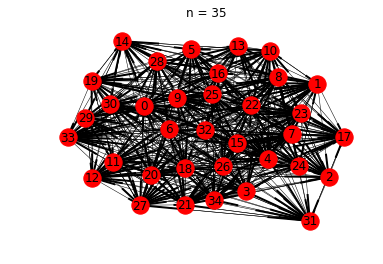

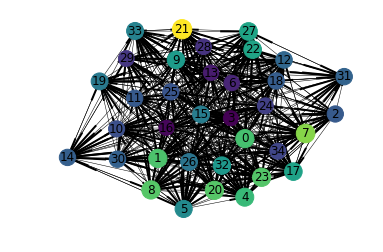

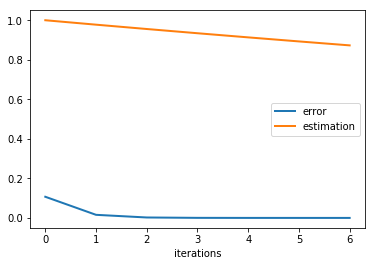

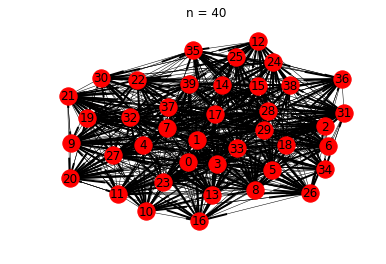

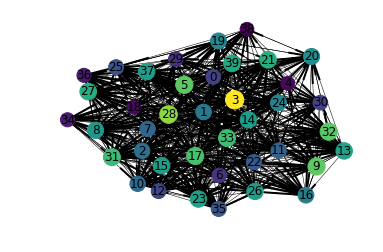

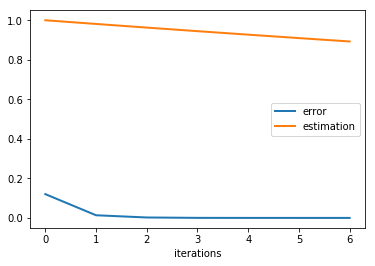

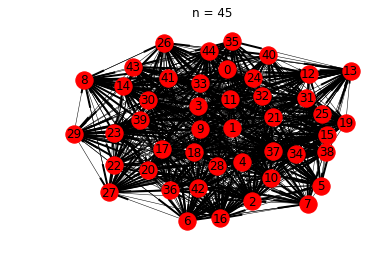

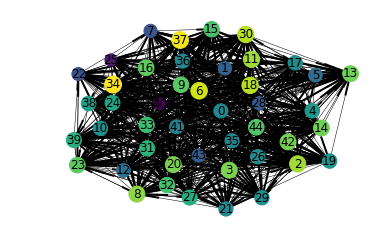

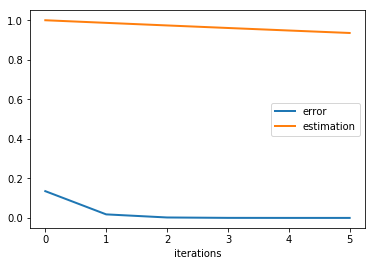

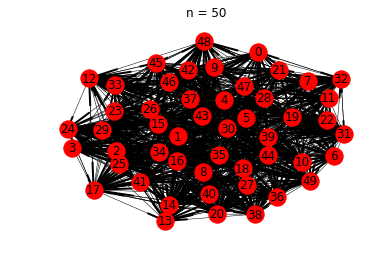

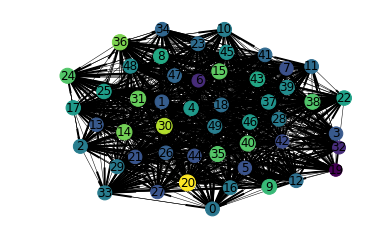

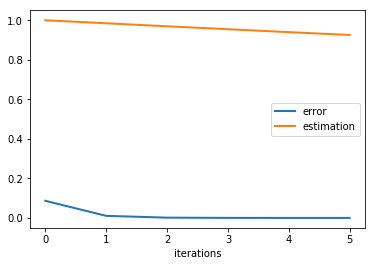

In [138]:
for n in range(10, 55, 5):    
    plt.subplots()
    
    p = 0.5
    edges = random_graph(n, p)

    plt.title('n = %d'%n)
    
    '''
    Отрисовка графа
    '''
    G = networkx.DiGraph()
    G.add_edges_from(edges)
    G.add_nodes_from(np.arange(n))
    plt.axis('off')
    networkx.draw_networkx(G, width=0.5)
    
    plt.subplots()
    
    '''
    Отрисовка графа, с учетом веса вершин
    '''
    start_distribution = np.ones((1, n)) / n
    pr_distribution = page_rank(edges, start_distribution, N=n)
    size_const = 10 ** 4
    plt.axis('off')
    networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                           node_color=pr_distribution)
    
    plt.subplots()
    
    '''
    Скорость сходимости
    '''
    pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True, N=n)
    errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

    x = np.arange(len(errors))
    plt.plot(x, errors, lw=2, label='error')
    plt.plot(x, (1 - np.min(pr_distribution)) ** x, 
             lw=2, label='estimation')
    plt.legend()
    plt.xlabel('iterations')
    plt.show()

**Вывод:** Чем больше n, тем быстрее мы сходимся к предельному распределению.

**Зависимость от p**

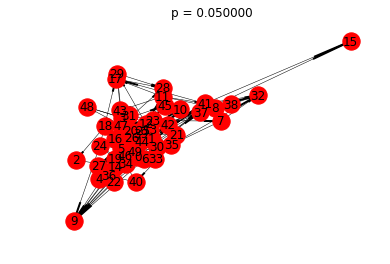

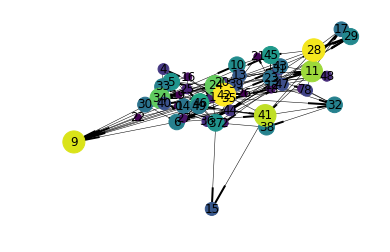

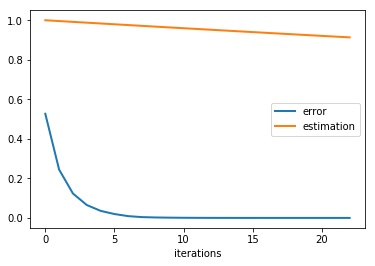

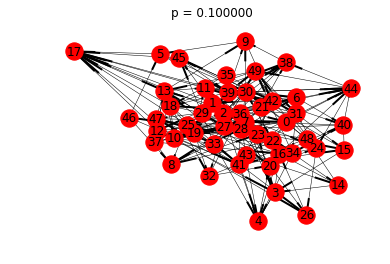

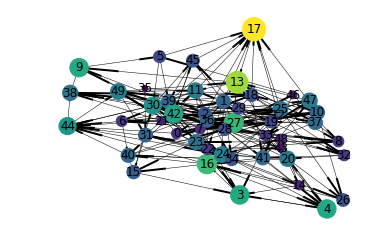

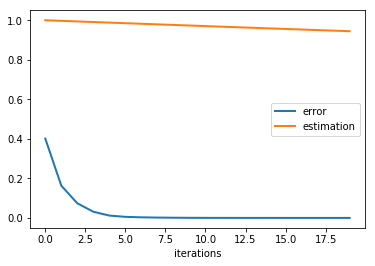

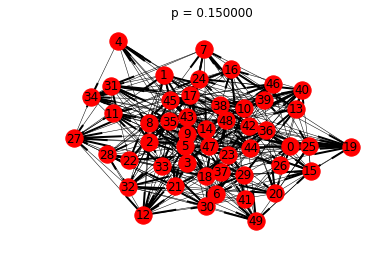

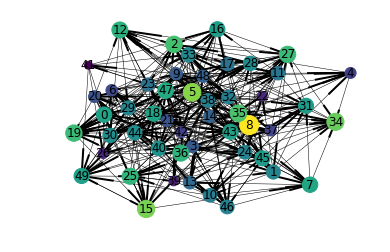

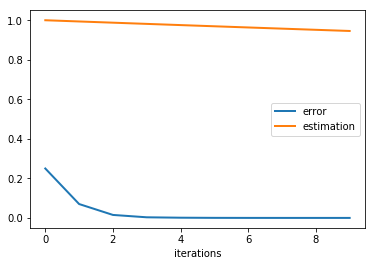

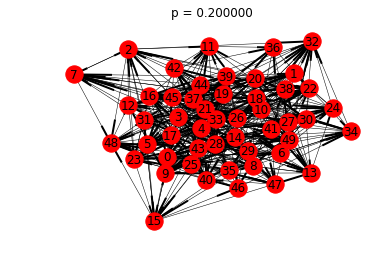

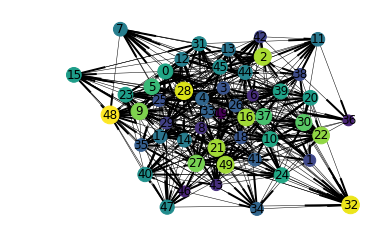

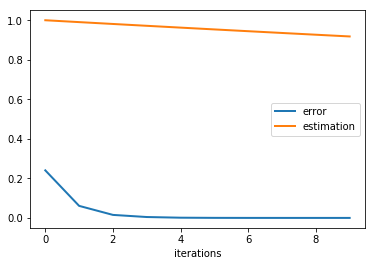

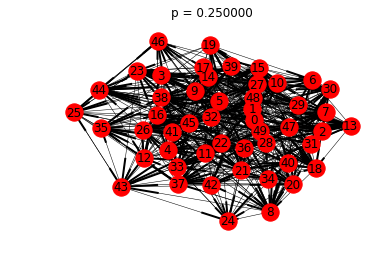

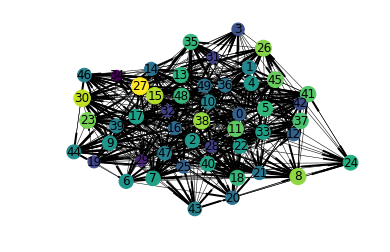

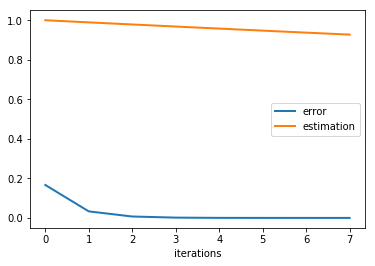

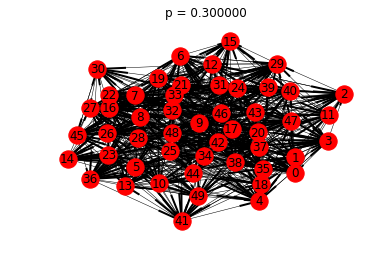

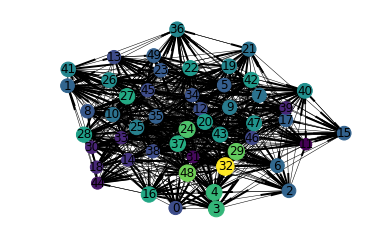

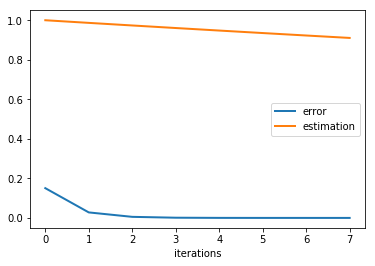

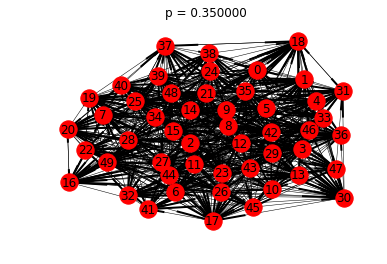

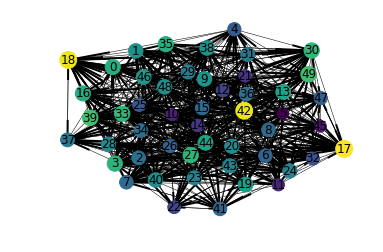

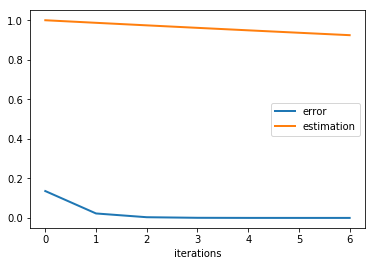

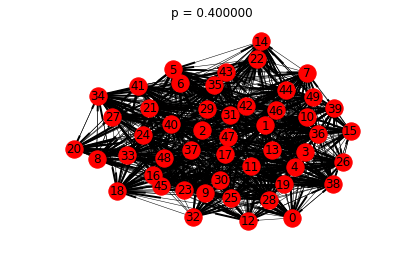

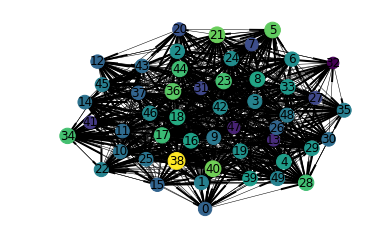

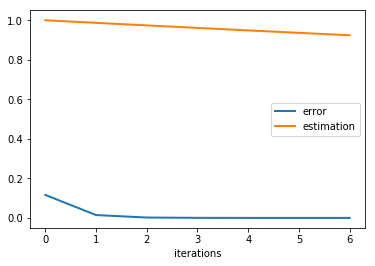

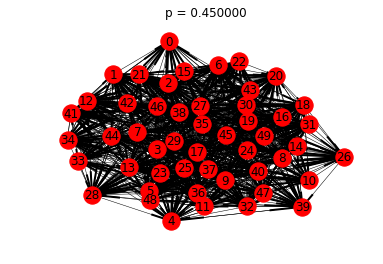

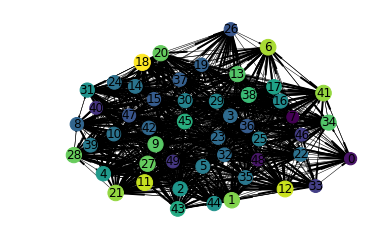

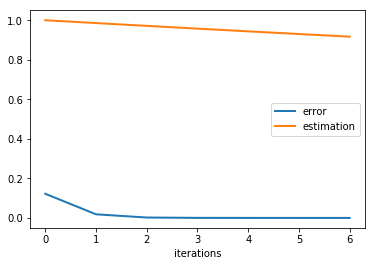

In [139]:
for p in np.arange(0.05, 0.5, 0.05):
    plt.subplots()
    
    n = 50
    edges = random_graph(n, p)

    plt.title('p = %f'%p)
    
    '''
    Отрисовка графа
    '''
    G = networkx.DiGraph()
    G.add_edges_from(edges)
    G.add_nodes_from(np.arange(n))
    plt.axis('off')
    networkx.draw_networkx(G, width=0.5)
    
    plt.subplots()
    
    '''
    Отрисовка графа, с учетом веса вершин
    '''
    start_distribution = np.ones((1, n)) / n
    pr_distribution = page_rank(edges, start_distribution, N=n)
    size_const = 10 ** 4
    plt.axis('off')
    networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                           node_color=pr_distribution)
    
    plt.subplots()
    
    '''
    Скорость сходимости
    '''
    pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True, N=n)
    errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

    x = np.arange(len(errors))
    plt.plot(x, errors, lw=2, label='error')
    plt.plot(x, (1 - np.min(pr_distribution)) ** x, 
             lw=2, label='estimation')
    plt.legend()
    plt.xlabel('iterations')
    plt.show()

**Вывод:** Чем больше n, тем быстрее мы сходимся к предельному распределению. 

**Зависимость от начального распределения**

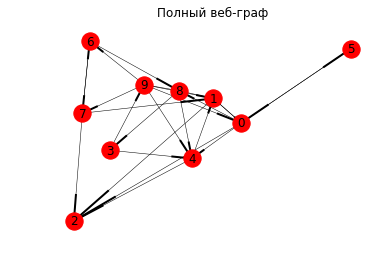

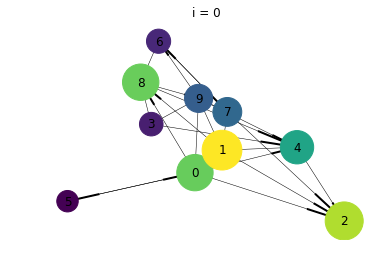

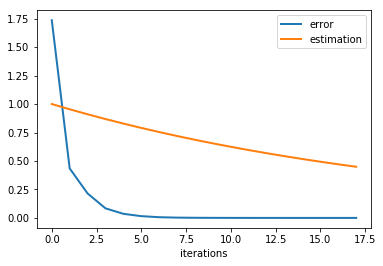

Предельное распределение [ 0.13204829  0.15787213  0.14444307  0.05543473  0.11113041  0.04598452
  0.05838701  0.08320147  0.13250388  0.07899449]


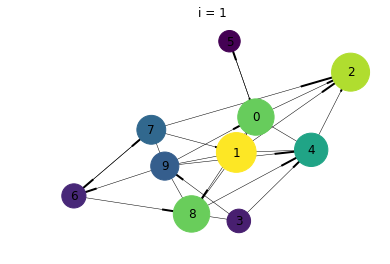

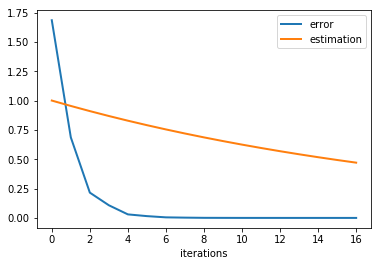

Предельное распределение [ 0.13204828  0.15787214  0.14444308  0.05543473  0.11113042  0.04598452
  0.05838701  0.08320147  0.13250386  0.07899449]


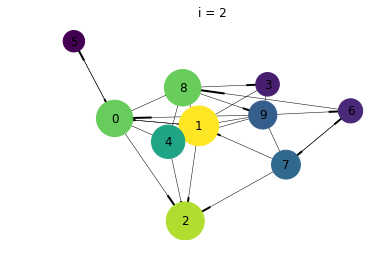

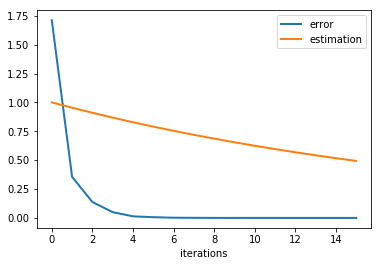

Предельное распределение [ 0.13204814  0.15787214  0.14444307  0.05543473  0.11113037  0.04598447
  0.05838708  0.0832016   0.13250389  0.0789945 ]


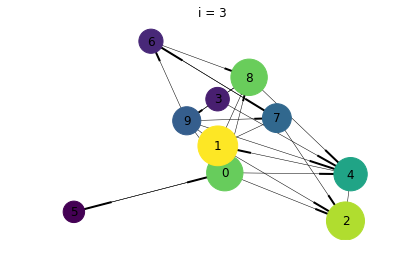

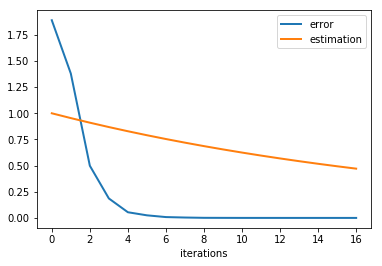

Предельное распределение [ 0.13204816  0.1578721   0.14444304  0.05543475  0.11113037  0.04598448
  0.05838707  0.08320159  0.13250392  0.0789945 ]


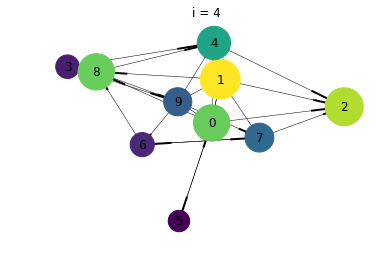

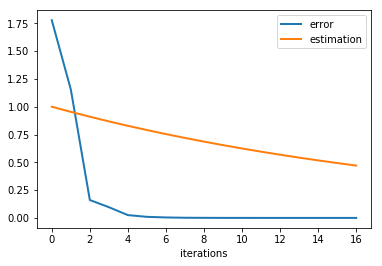

Предельное распределение [ 0.13204826  0.15787213  0.14444306  0.05543474  0.11113042  0.04598451
  0.05838703  0.08320149  0.13250388  0.0789945 ]


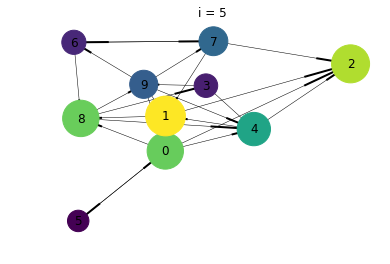

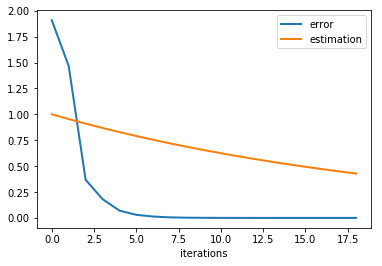

Предельное распределение [ 0.13204827  0.15787213  0.14444307  0.05543473  0.11113041  0.04598451
  0.05838702  0.08320148  0.13250388  0.07899449]


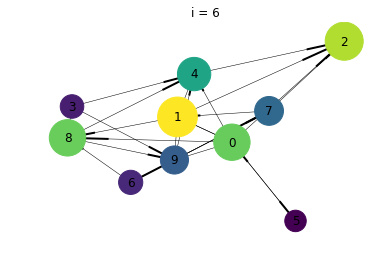

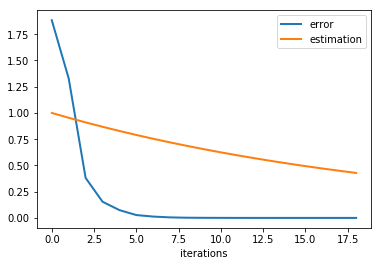

Предельное распределение [ 0.13204813  0.15787212  0.14444305  0.05543474  0.11113038  0.04598447
  0.05838709  0.08320162  0.1325039   0.07899451]


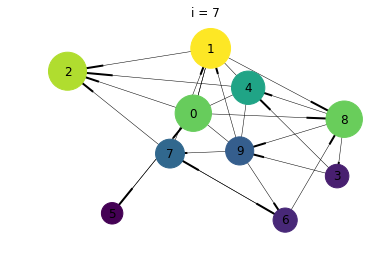

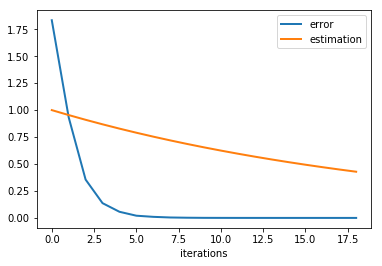

Предельное распределение [ 0.13204814  0.15787213  0.14444306  0.05543474  0.11113038  0.04598447
  0.05838708  0.0832016   0.1325039   0.0789945 ]


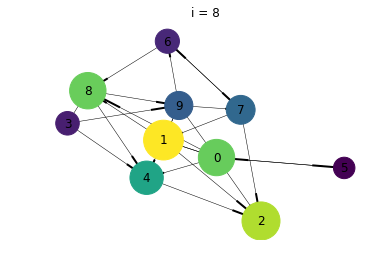

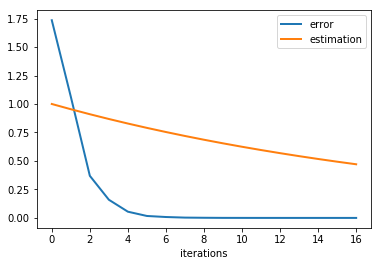

Предельное распределение [ 0.13204811  0.15787214  0.14444307  0.05543473  0.11113035  0.04598446
  0.0583871   0.08320164  0.13250391  0.07899449]


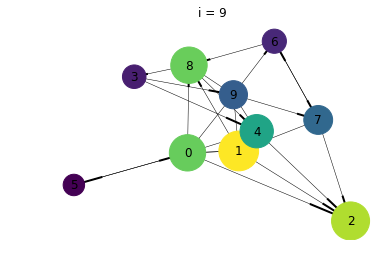

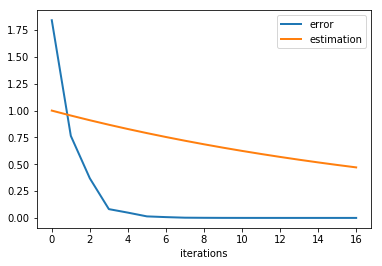

Предельное распределение [ 0.13204809  0.1578721   0.14444304  0.05543475  0.11113039  0.04598445
  0.0583871   0.08320165  0.13250391  0.07899452]


In [140]:
n, p = 10, 0.3
edges = random_graph(n, p)

'''
Отрисовка графа
'''
G = networkx.DiGraph()
G.add_edges_from(edges)
G.add_nodes_from(np.arange(n))
plt.title('Полный веб-граф')
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

for i in range(10):
    plt.subplots()
    
    '''
    Отрисовка графа, с учетом веса вершин
    '''
    start_distribution = [0] * i + [1] + [0] * (n - i - 1)
    pr_distribution = page_rank(edges, start_distribution, N=n)
    size_const = 10 ** 4
    plt.title('i = %d'%i)
    plt.axis('off')
    networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                           node_color=pr_distribution)
    
    plt.subplots()
    
    '''
    Скорость сходимости
    '''
    pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True, N=n)
    errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

    x = np.arange(len(errors))
    plt.plot(x, errors, lw=2, label='error')
    plt.plot(x, (1 - np.min(pr_distribution)) ** x, 
             lw=2, label='estimation')
    plt.legend()
    plt.xlabel('iterations')
    plt.show()
    
    print('Предельное распределение', pr_distribution)

**Вывод:** Если ждать, пока будет найдено предельное распределение (с точностью << $\epsilon$), то разница в количестве итераций будет связана лишь с тем, что какие-то распределения изначально находятся близко к предельному. Во второй части есть пример, в котором видно, что если не ждать до того момента, когда предельное вычислится очень точно, то $PageRank$ будет сильно зависеть от того, какое распределение было начальным.

**Вес вершины** зависит от того, насколько велика вероятность попасть в данную вершину (или, другими словами, от количества ребер, входящих в данную вершину).

## Часть 2

В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [141]:
def load_links(url, sleep_time=1, attempts=5, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            # print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000). Таким сайтом может быть, например, сайт <a href=http://ru.discrete-mathematics.org>кафедры Дискретной математики</a> (аккуратнее, если забанят, то лишитесь доступа к учебным материалам ;), <a href=http://yandexdataschool.ru>Школы анализа данных</a>, сайт магазина, больницы.

Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

Для получения дополнительных баллов проведите аналогичные исследования для больших сайтов. Так же вы можете провести исследования, не ограничиваясь загрузкой только одного сайта.

**Описание агоритма выкачивания сайта**

1. Начиная со стартовой страницы, помещаем в $urls$ все новые ссылки, которые есть на данной странцие и соответствующие пары в $links$.
2. Пока в $urls$ есть необработанные ссылки - продолжаем работу.

In [144]:
'''
Выкачиваем сайт ШАДа
'''
urls = ['https://yandexdataschool.ru/']
site = get_site(urls[0])
links = []

i = 0

while(True):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        links_from_url = list(filter(lambda x: x.startswith('https://'),
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно
    
    i += 1
    
    if i == len(urls):
        break

In [145]:
yandex_urls = urls
yandex_links = links

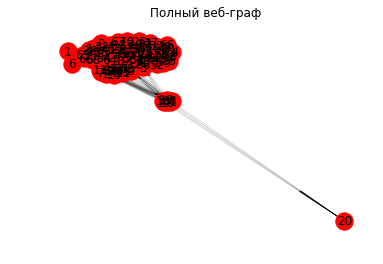

In [184]:
G = networkx.DiGraph()
G.add_edges_from(links)
G.add_nodes_from(np.arange(len(urls)))
plt.title('Полный веб-граф')
plt.axis('off')
networkx.draw_networkx(G, width=0.1)

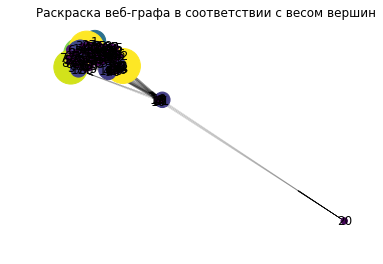

In [185]:
start_distribution = np.ones((1, len(urls))) / len(urls)
pr_distribution = page_rank(links, start_distribution, N=len(urls))

size_const = 10 ** 4
plt.title('Раскраска веб-графа в соответствии с весом вершин')
plt.axis('off')
networkx.draw_networkx(G, width=0.1, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

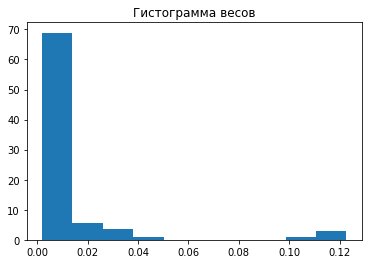

In [186]:
plt.hist(pr_distribution, normed=True)

plt.title('Гистограмма весов')
plt.show()

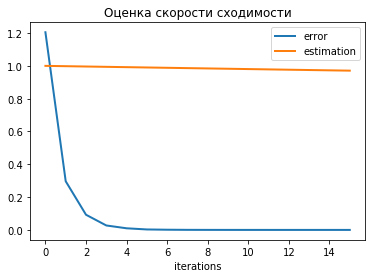

In [187]:
start_distribution = np.ones((1, len(urls))) / len(urls)
pr_distribution, pr_trace = page_rank(links, start_distribution,
                                      return_trace=True, N=len(urls))
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - np.min(pr_distribution)) ** x, 
         lw=2, label='estimation')
plt.legend()
plt.title('Оценка скорости сходимости')
plt.xlabel('iterations')
plt.show()

**Вывод:** В реальности предельное распределение находится намного быстрее, чем в теории. В данном случае, начиная с 5 итерации, разницу между распределениями уже можно считать малой.

**Рассмотрим 15 самых тяжелых вершин.**

In [188]:
tmp = sorted(pr_distribution)
tmp = tmp[::-1]

In [210]:
treshold = tmp[15]

induc = []
induc_edges = []

for i in range(len(pr_distribution)):
    if pr_distribution[i] > treshold:
        induc.append(urls[i])
        
for i in links:
    if pr_distribution[i[0]] > treshold and pr_distribution[i[1]] > treshold:
        induc_edges.append(i)

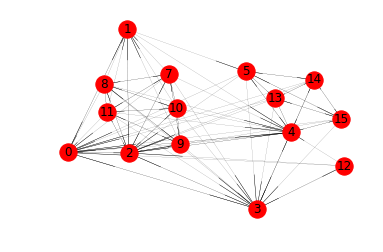

In [211]:
G = networkx.DiGraph()
G.add_edges_from(induc_edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.1)

**Вывод:** Страницы с наибольшим весом - это страницы, в которые идет больше всего ссылок с других страниц. Понять это можно было из матрицы переходных вероятностей: если из $u_{i}$ есть ребро в $u_{j}$, то к вероятности телепортации добавляется еще какое-то положительное значение $\implies$ вероятность попасть в $u_{j}$ больше.

**Рассмотрим еще какой-нибудь маленький сайт**

In [77]:
'''
Выкачиваем сайт
'''
urls = ['http://jasonjam.es/']
site = get_site(urls[0])
links = []

i = 0

while(True):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
#         links_from_url = list(filter(lambda x: x.startswith('https://'),
#                                      links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно
    
    i += 1
    
    if i == len(urls):
        break

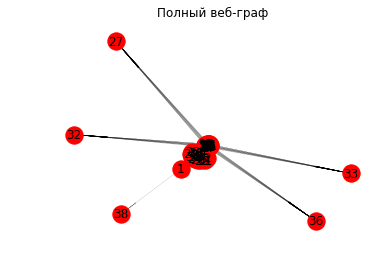

In [78]:
G = networkx.DiGraph()
G.add_edges_from(links)
G.add_nodes_from(np.arange(len(urls)))
plt.title('Полный веб-граф')
plt.axis('off')
networkx.draw_networkx(G, width=0.1)

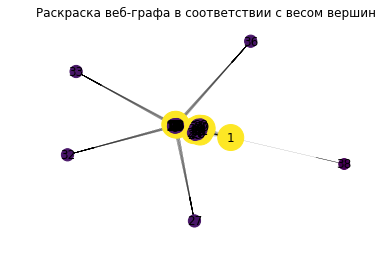

In [79]:
start_distribution = np.ones((1, len(urls))) / len(urls)
pr_distribution = page_rank(links, start_distribution, N=len(urls))

size_const = 10 ** 4
plt.title('Раскраска веб-графа в соответствии с весом вершин')
plt.axis('off')
networkx.draw_networkx(G, width=0.1, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

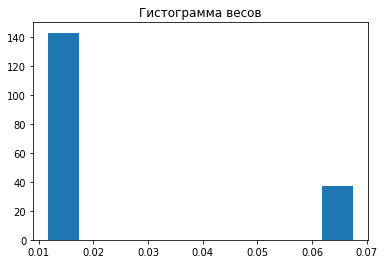

In [80]:
plt.hist(pr_distribution, normed=True)

plt.title('Гистограмма весов')
plt.show()

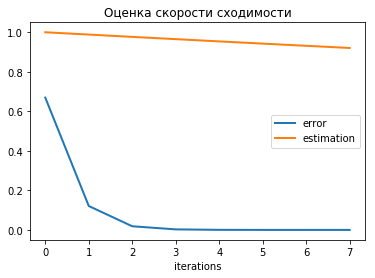

In [81]:
start_distribution = np.ones((1, len(urls))) / len(urls)
pr_distribution, pr_trace = page_rank(links, start_distribution,
                                      return_trace=True, N=len(urls))
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - np.min(pr_distribution)) ** x, 
         lw=2, label='estimation')
plt.legend()
plt.title('Оценка скорости сходимости')
plt.xlabel('iterations')
plt.show()

In [82]:
tmp = sorted(pr_distribution)
tmp = tmp[::-1]

In [83]:
treshold = tmp[10]

induc = []
induc_edges = []

for i in range(len(pr_distribution)):
    if pr_distribution[i] > treshold:
        induc.append(urls[i])
        
for i in links:
    if pr_distribution[i[0]] > treshold and pr_distribution[i[1]] > treshold:
        induc_edges.append(i)

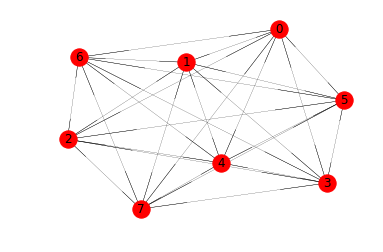

In [84]:
G = networkx.DiGraph()
G.add_edges_from(induc_edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.1)

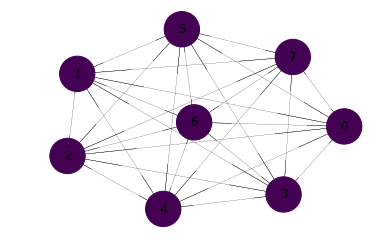

In [85]:
start_distribution = np.ones((1, len(induc))) / len(induc)
pr_distribution = page_rank(induc_edges, start_distribution, N=len(induc))

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.1, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

**Вывод:** Для маленьких сайтов все примерно одинаково.

**Посмотрим, что будет с PageRank при разных начальных распределениях, если не доводить его до сходимости**

In [86]:
def count_p(a, b, n, i, j):
    step = int(n / 3)
    if int(i / step) != int(j / step):
        return b
    else:
        return a

def special_graph(n, a=0.8, b=0.01):
    links = []
    
    for i in range(n):
        for j in range(n):
            p = count_p(a, b, n, i, j)
            if bernoulli.rvs(p) == 1:
                links.append((i, j))
    return links

def page_rank_short(links, start_distribution, damping_factor=0.15,
                    return_trace=False, N=None):
    '''
    Как обычный PageRank, только делаем 10 итераций
    '''
    prob_matrix = create_page_rank_markov_chain(links, 
                                                damping_factor=damping_factor,
                                                N=N)
    distribution = np.matrix(start_distribution)
    
    trace = []
    
    for i in range(10):
        trace.append(distribution)
        distribution = distribution * prob_matrix
    
    if return_trace:
        return np.array(distribution).ravel(), np.array(trace)
    else:
        return np.array(distribution).ravel()
    

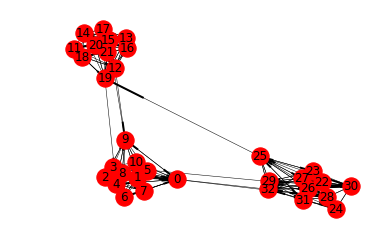

In [87]:
N = 33
edges = special_graph(N)

G = networkx.DiGraph()
G.add_edges_from(edges)
G.add_nodes_from(np.arange(N)) # добавление вершин
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

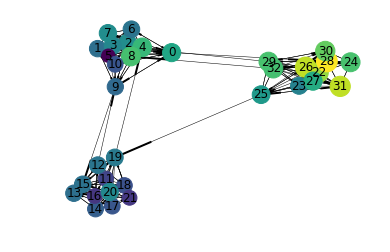

In [88]:
start_distribution = 32*[0] + [1]
pr_distribution = page_rank_short(edges, start_distribution, N=N)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

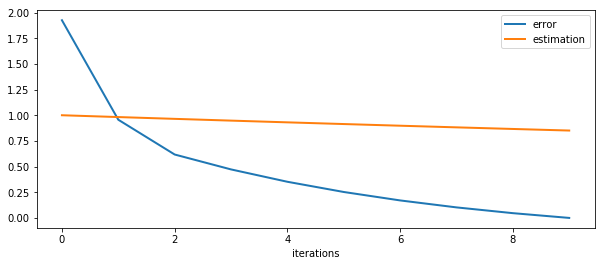

In [89]:
start_distribution = [0] * 32 + [1]
pr_distribution, pr_trace = page_rank_short(edges, start_distribution,
                                            return_trace=True, N=N)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - np.min(pr_distribution)) ** x, 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

**Вывод:** Кажется, что пользователь будет оставаться в той части сайта, в которой он начал. Ниже нарисуем графы, для которых начальное распределение было другим.

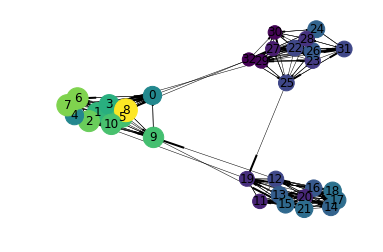

In [90]:
N = 33
edges = special_graph(N)

start_distribution = [1] + 32*[0]
pr_distribution = page_rank_short(edges, start_distribution, N=N)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

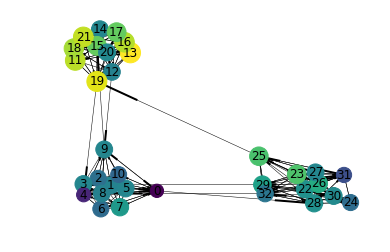

In [91]:
N = 33
edges = special_graph(N)

start_distribution = [0] * 11 + [1] + [0] * 21
pr_distribution = page_rank_short(edges, start_distribution, N=N)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

**Рассмотрим какой-нибудь большой сайт**

In [92]:
'''
Выкачиваем сайт nginx
'''
urls = ['http://nginx.org/']
site = get_site(urls[0])
links = []

i = 0

while(True):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        links_from_url = list(filter(lambda x: x.startswith('http://'),
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно
    
    i += 1
    print(len(urls))
    if i == len(urls):
        break

21
102
105
110
114
117
119
123
130
131
135
194
223
338
346
346
359
376
394
409
443
443
443
443
443
443
443
443
443
443
443
443
443
443
443
443
447
454
562
644
677
729
789
835
847
859
866
880
888
888
888
895
895
911
911
917
920
920
932
932
934
939
942
947
951
957
959
966
966
972
977
983
985
993
1001
1006
1009
1016
1019
1019
1019
1019
1024
1024
1033
1035
1037
1043
1044
1045
1046
1046
1047
1048
1058
1059
1059
1059
1061
1061
1061
1061
1061
1098
1098
1098
1098
1098
1098
1098
1102
1102
1102
1102
1104
1104
1111
1111
1111
1111
1111
1111
1111
1111
1111
1111
1111
1115
1121
1122
1122
1122
1122
1122
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123
1123


*Вывод чисел - это я не специально добавил. Просто хотел посмотреть, что хотя бы что-то происходит. Потом код работал долго и перезапускать я уже не стал*

In [124]:
nginx = urls
ngnix_links = links

*На всякий случай сохранил эти массивы (вдруг что-то поломается, тогда не придется заново выкачивать сайт*

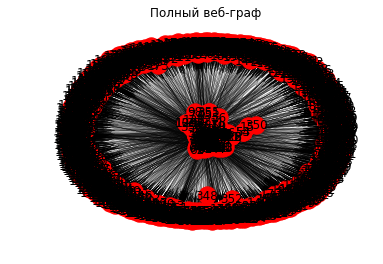

In [213]:
G = networkx.DiGraph()
G.add_edges_from(ngnix_links)
G.add_nodes_from(np.arange(len(nginx)))
plt.title('Полный веб-граф')
plt.axis('off')
networkx.draw_networkx(G, width=0.1)

In [214]:
start_distribution = [1] + [0] * (len(nginx) - 1)
pr_distribution = page_rank(ngnix_links, start_distribution, N=len(nginx))

*Раскрашивает согласно весу вершины очень долго - поэтому убрал.*

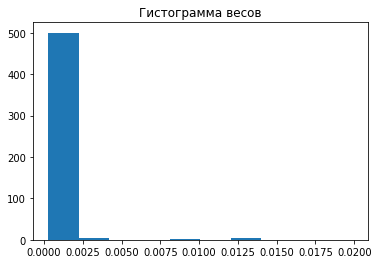

In [215]:
plt.hist(pr_distribution, normed=True)

plt.title('Гистограмма весов')
plt.show()

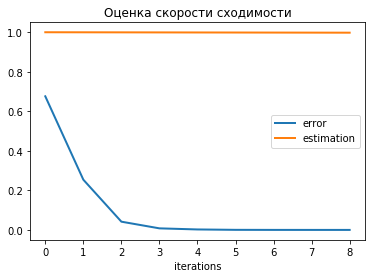

In [216]:
start_distribution = np.ones((1, len(nginx))) / len(nginx)
pr_distribution, pr_trace = page_rank(ngnix_links, start_distribution,
                                      return_trace=True, N=len(nginx))
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - np.min(pr_distribution)) ** x, 
         lw=2, label='estimation')
plt.legend()
plt.title('Оценка скорости сходимости')
plt.xlabel('iterations')
plt.show()

In [217]:
tmp = sorted(pr_distribution)
tmp = tmp[::-1]

In [218]:
treshold = tmp[20]

induc = []
induc_edges = []

for i in range(len(pr_distribution)):
    if pr_distribution[i] > treshold:
        induc.append(nginx[i])
        
for i in links:
    if pr_distribution[i[0]] > treshold and pr_distribution[i[1]] > treshold:
        induc_edges.append(i)

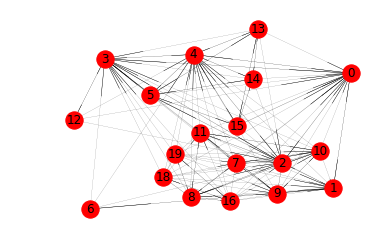

In [219]:
G = networkx.DiGraph()
G.add_edges_from(induc_edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.1)

*Не получилось написать алгоритм, который позволит раскрашивать граф, согласно весу вершины - там получается, что иногда вершин k, а одна из них имеет номер k + i, и тогда все ломается. Ну это вроде можно исправить, но я не успел.*